In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [8]:
# ── Charger les données ───────────────────────────────────────────────────────
rows = list(csv.DictReader(open('run_419/history.csv')))

epoch_rows = [r for r in rows if r['epoch_avg_loss']]
val_rows   = [r for r in rows if r['epoch_val_loss']]

def parse_array(s):
    return np.array([float(x) for x in s.strip('[]').split()])

epochs       = list(range(1, len(epoch_rows) + 1))
train_loss   = [float(r['epoch_avg_loss']) for r in epoch_rows]
val_loss     = [float(r['epoch_val_loss'])  for r in val_rows]
train_recall = [parse_array(r['train_recall']) for r in epoch_rows]
val_recall   = [parse_array(r['val_recall'])   for r in val_rows]
train_ious   = [parse_array(r['train_ious'])   for r in epoch_rows]
val_ious     = [parse_array(r['val_ious'])     for r in val_rows]

classes      = ['Background', 'Tropical Cyclones', 'Atm. Rivers']
colors_train = ['#38bdf8', '#f472b6', '#34d399']
colors_val   = ['#0ea5e9', '#ec4899', '#10b981']

Saved: training_dashboard.png


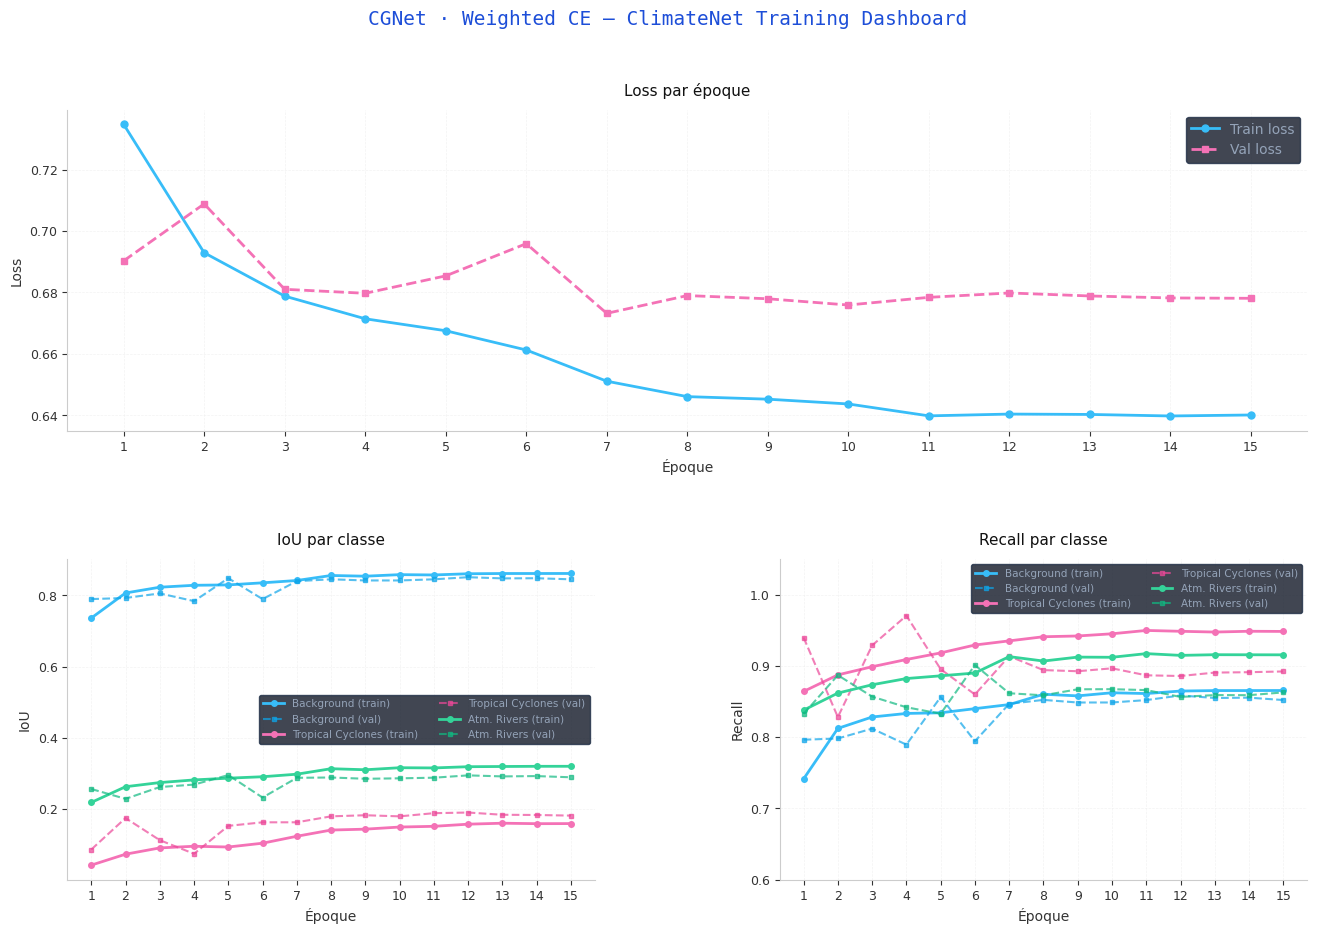

In [ ]:
# ── Figure ────────────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(16, 10), facecolor='white')
gs  = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.35)

ax_loss = fig.add_subplot(gs[0, :])   # Loss par époque (full width, haut)
ax_iou  = fig.add_subplot(gs[1, 0])   # IoU par classe (bas gauche)
ax_rec  = fig.add_subplot(gs[1, 1])   # Recall par classe (bas droite)

for ax in [ax_loss, ax_iou, ax_rec]:
    ax.set_facecolor('white')
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(True)
    ax.spines[['top', 'right', 'left', 'bottom']].set_color('#cccccc')
    ax.tick_params(colors='#333333', labelsize=9)
    ax.xaxis.label.set_color('#333333')
    ax.yaxis.label.set_color('#333333')
    ax.title.set_color('#111111')
    ax.grid(color='#dddddd', linewidth=0.5, linestyle='--', alpha=1.0)

# ── 1. Loss par époque (haut, pleine largeur) ─────────────────────────────────
ax_loss.plot(epochs, train_loss, color='#38bdf8', linewidth=2,
             marker='o', markersize=5, label='Train loss')
ax_loss.plot(epochs, val_loss, color='#f472b6', linewidth=2,
             marker='s', markersize=5, label='Val loss', linestyle='--')

ax_loss.set_title('Loss par époque', fontsize=11, pad=10)
ax_loss.set_xlabel('Époque')
ax_loss.set_ylabel('Loss')
ax_loss.set_xticks(epochs)
ax_loss.legend(fontsize=10, facecolor='#f8f8f8', edgecolor='#cccccc'
              labelcolor='#333333',)

# ── 2. IoU par classe (bas gauche) ────────────────────────────────────────────
for i, (cls, ct, cv) in enumerate(zip(classes, colors_train, colors_val)):
    ti = [r[i] for r in train_ious]
    vi = [r[i] for r in val_ious]
    ax_iou.plot(epochs, ti, color=ct, linewidth=2, marker='o', markersize=4,
                label=f'{cls} (train)')
    ax_iou.plot(epochs, vi, color=cv, linewidth=1.5, marker='s', markersize=3,
                linestyle='--', label=f'{cls} (val)', alpha=0.7)

ax_iou.set_title('IoU par classe', fontsize=11, pad=10)
ax_iou.set_xlabel('Époque')
ax_iou.set_ylabel('IoU')
ax_iou.set_xticks(epochs)
ax_iou.legend(fontsize=7.5, facecolor='#f8f8f8', edgecolor='#cccccc'
              labelcolor='#333333', ncol=2)

# ── 3. Recall par classe (bas droite) ─────────────────────────────────────────
for i, (cls, ct, cv) in enumerate(zip(classes, colors_train, colors_val)):
    tr = [r[i] for r in train_recall]
    vr = [r[i] for r in val_recall]
    ax_rec.plot(epochs, tr, color=ct, linewidth=2, marker='o', markersize=4,
                label=f'{cls} (train)')
    ax_rec.plot(epochs, vr, color=cv, linewidth=1.5, marker='s', markersize=3,
                linestyle='--', label=f'{cls} (val)', alpha=0.7)

ax_rec.set_title('Recall par classe', fontsize=11, pad=10)
ax_rec.set_xlabel('Époque')
ax_rec.set_ylabel('Recall')
ax_rec.set_xticks(epochs)
ax_rec.set_ylim(0.6, 1.05)
ax_rec.legend(fontsize=7.5, facecolor='#f8f8f8', edgecolor='#cccccc'
              labelcolor='#333333', ncol=2)

# ── Titre principal ───────────────────────────────────────────────────────────
fig.suptitle('CGNet · Weighted CE — ClimateNet Training Dashboard',
             fontsize=14, color='#1d4ed8', y=0.98, fontfamily='monospace')

plt.savefig('training_dashboard.png', dpi=150, bbox_inches='tight', facecolor='white')

print("Saved: training_dashboard.png")
plt.show()